In [1]:
import numpy as np
from matplotlib import pyplot as pp
from scipy import linalg
%matplotlib inline

In [2]:
L = 0.01
nx,ny = 21,21
dx = L / (nx - 1)
dy = L / (ny - 1)
Tb = 100

x = np.linspace(0.0, L, num = nx)
y = np.linspace(0.0, L, num = ny)

alpha = 1e-4

T0 = np.full([ny,nx],20.0)
T0[0,:] = 100.0
T0[:,0] = 100.0

In [3]:
def btcs(T0, nt, dt, dx, alpha):
    ny,nx = T0.shape
    M = nx - 2
    N = ny - 2
    sigma = alpha * dt / dx**2
    
    A = lhs_operator(M, N,sigma)
    
    T = map_2d_to_1d(T0)
    I, J = int(M / 2), int(N / 2)
    
    for n in range(nt):
        b = rhs_vector(T, M, N, sigma, Tb)
        T = linalg.solve(A,b)
        if T[J * M + I] >= 70.0:
            break
    print(T[J * M + I], (n + 1) * dt)
    return map_1d_to_2d(T, nx, ny, Tb)

In [4]:
def lhs_operator(M,N,sigma):
    A = np.zeros((M * N,M * N))
    for j in range(N):
        for i in range(M):
            I = j * M + i
            west = I - 1
            east = I + 1
            south = I - M
            north = I + M
            if i == 0 and j == 0:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif i == M-1 and j == 0:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, west] = -1.0
                A[I, north] = -1.0
            elif i == 0 and j == N-1:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, south] = -1.0
                A[I, east] = -1.0
            elif i == M-1 and j== N-1:
                A[I, I] = 1.0 / sigma + 2.0
                A[I, south] = -1.0
                A[I, west] = -1.0
            elif i == 0:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, south] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif i == M - 1:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, north] = -1.0
            elif j == 0:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, west] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif j == N - 1:
                A[I, I] = 1.0 / sigma + 3.0
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, east] = -1.0
            else:
                A[I, I] = 1.0 / sigma + 4.0
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
    return A

In [5]:
def rhs_vector(T, M, N, sigma, Tb):
    b = 1 / sigma * T
    for j in range(N):
        for i in range(M):
            I = j * M + i
            if i == 0:
                b[I] += Tb
            if j == 0:
                b[I] += Tb
    return b

In [6]:
def map_2d_to_1d(T0):
    T = T0[1:-1,1:-1].flatten()
    return T

In [9]:
def map_1d_to_2d(T, nx, ny, Tb):
    T_2d = np.zeros((ny, nx))
    T_2d[1:-1,1:-1] = T.reshape((ny-2, nx-2))
    T_2d[0,:] = Tb
    T_2d[:,0] = Tb
    T_2d[-1,:] = T_2d[-2,:]
    T_2d[:,-1] = T_2d[:,-2]
    return T_2d

In [10]:
nt = 300
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha

T = btcs(T0, nt, dt, dx, alpha)

70.00387455599684 0.16062499999999996


In [12]:
pp.rcParams['font.family'] = 'serif'
pp.rcParams['font.size'] = 16

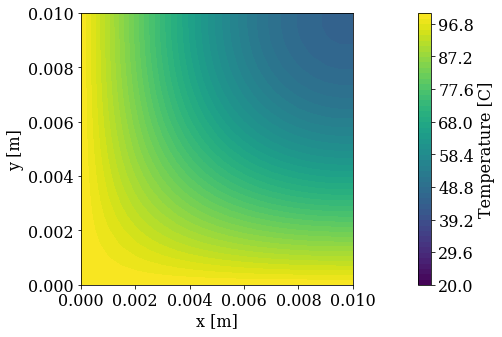

In [14]:
pp.figure(figsize=(8.0, 5.0))
pp.xlabel('x [m]')
pp.ylabel('y [m]')
levels = np.linspace(20.0, 100.0, num=51)
contf = pp.contourf(x, y, T, levels=levels)
cbar = pp.colorbar(contf)
cbar.set_label('Temperature [C]')
pp.axis('scaled', adjustable='box');